


Name:- Sudhir Kumar Singh 

Roll no:- TEAD23152 

CYK Result: True


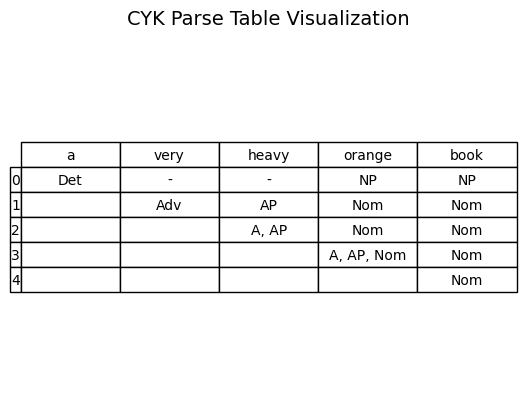

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Grammar rules
R = {
    "NP": [["Det", "Nom"]],
    "Nom": [["AP", "Nom"], ["book"], ["orange"], ["man"]],
    "AP": [["Adv", "A"], ["heavy"], ["orange"], ["tall"]],
    "Det": [["a"]],
    "Adv": [["very"], ["extremely"]],
    "A": [["heavy"], ["orange"], ["tall"], ["muscular"]]
}

# CYK Parsing Function with visualization
def cykParseVisual(w):
    n = len(w)
    T = [[set() for _ in range(n)] for _ in range(n)]

    # Fill the diagonal with terminal matches
    for j in range(n):
        for lhs, rules in R.items():
            for rhs in rules:
                if len(rhs) == 1 and rhs[0] == w[j]:
                    T[j][j].add(lhs)

    # Fill upper triangle of the table
    for l in range(2, n + 1):
        for i in range(n - l + 1):
            j = i + l - 1
            for k in range(i, j):
                for lhs, rules in R.items():
                    for rhs in rules:
                        if len(rhs) == 2:
                            B, C = rhs
                            if B in T[i][k] and C in T[k + 1][j]:
                                T[i][j].add(lhs)

    # Print result
    print("\n\n")
    print("Name:- Sudhir Kumar Singh \n")
    print("Roll no:- TEAD23152 \n")
    
    result = "NP" in T[0][n - 1]
    print("CYK Result:", "True" if result else "False")

    # ========== Visualization ==========
    fig, ax = plt.subplots()
    ax.set_axis_off()

    table_data = []
    for row in range(n):
        table_row = []
        for col in range(n):
            if col < row:
                table_row.append("")  # Lower triangle remains empty
            else:
                cell = ", ".join(sorted(T[row][col])) if T[row][col] else "-"
                table_row.append(cell)
        table_data.append(table_row)

    # Add the words as column headers
    col_labels = [f"{w[i]}" for i in range(n)]

    table = ax.table(
        cellText=table_data,
        colLabels=col_labels,
        rowLabels=[f"{i}" for i in range(n)],
        loc='center',
        cellLoc='center'
    )

    table.scale(1, 1.5)
    plt.title("CYK Parse Table Visualization", fontsize=14)
    plt.show()

# ------------------------
# Example sentence
sentence = "a very heavy orange book".split()
cykParseVisual(sentence)
